Downloading...
From: https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100% 8.54k/8.54k [00:00<00:00, 18.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100% 4.25k/4.25k [00:00<00:00, 13.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100% 54.7k/54.7k [00:00<00:00, 79.0MB/s]


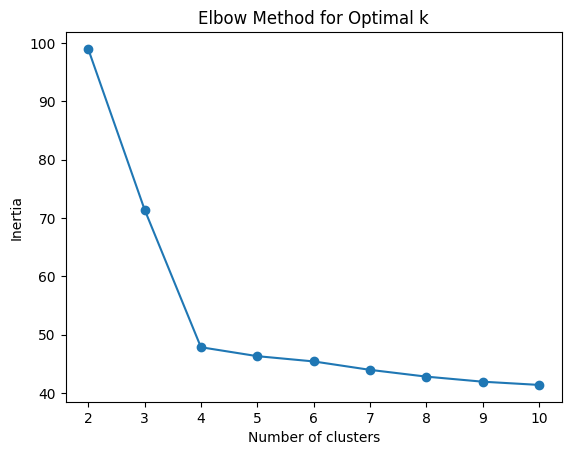

Davies-Bouldin Index: 1.1410936110884213


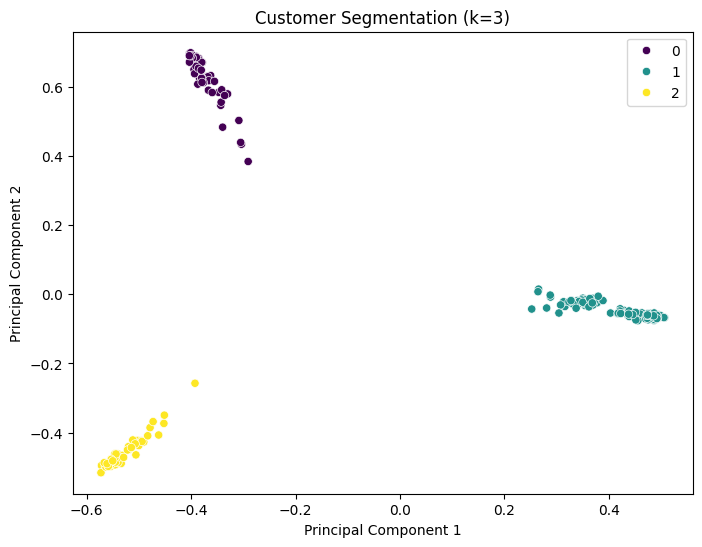

                                            combined_features  Cluster
CustomerID                                                            
C0001       South America Books SoundWave Cookbook South A...        1
C0002       Asia Home Decor BookWorld Cookware Set Asia Ho...        0
C0003       South America Home Decor ActiveWear Cookware S...        1
C0004       South America Books TechPro Textbook South Ame...        1
C0005       Asia Home Decor ActiveWear Cookware Set Asia E...        0


In [3]:
!gdown "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
!gdown "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
!gdown "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' and 'customer_features' are already defined as in the previous code
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Feature Engineering: Create a combined feature for each customer
merged_df = pd.merge(transactions, products, on='ProductID', how='left')
merged_df = pd.merge(merged_df, customers, on='CustomerID', how='left')

# Combine relevant features into a single string for each customer
merged_df['combined_features'] = merged_df['Region'] + ' ' + merged_df['Category'] + ' ' + merged_df['ProductName']
customer_features = merged_df.groupby('CustomerID')['combined_features'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorization: Convert text features to numerical vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(customer_features)

# Prepare the data for clustering (using TF-IDF matrix)
X = tfidf_matrix

# Find optimal number of clusters using the Elbow method
inertia = []
for n_clusters in range(2, 11):  # Test cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# Apply KMeans clustering with the chosen number of clusters (e.g., 4 based on the Elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Calculate DB Index
db_index = davies_bouldin_score(X.toarray(), labels)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize the clusters (example using 2 principal components if possible)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())  # Convert sparse matrix to dense matrix

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="viridis")
plt.title(f"Customer Segmentation (k={optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Add cluster labels to the customer_features DataFrame
customer_features_df = pd.DataFrame(customer_features)
customer_features_df['Cluster'] = labels

# Further analysis and visualization using cluster labels
print(customer_features_df.head())